In [75]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [76]:
filepath = os.path.join("resources/data/ml-03-data-processing-songs-dataset.csv")

In [77]:
data_prod_df = pd.read_csv(filepath)
data_prod_df

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004.0,10,157.0,30.0,53.0,-14.0,11.0,68.0,201,94.0,3.0,71.0
1,2,Black Night,Deep Purple,album rock,2000.0,3,135.0,79.0,50.0,-11.0,17.0,81.0,207,17.0,7.0,39.0
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001.0,6,168.0,69.0,66.0,-9.0,7.0,52.0,341,2.0,17.0,69.0
3,4,The Pretender,Foo Fighters,alternative metal,2007.0,1,173.0,96.0,43.0,-4.0,3.0,37.0,269,0.0,4.0,76.0
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002.0,8,106.0,82.0,58.0,-5.0,10.0,87.0,256,1.0,3.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958.0,4,94.0,21.0,NaN,-12.0,11.0,72.0,128,84.0,7.0,63.0
1990,1991,Hound Dog,Elvis Presley,adult standards,1958.0,6,175.0,76.0,NaN,-8.0,76.0,95.0,136,73.0,6.0,69.0
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959.0,4,168.0,80.0,NaN,-9.0,31.0,97.0,162,74.0,7.0,74.0
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959.0,10,174.0,26.0,45.0,-13.0,7.0,60.0,324,54.0,4.0,65.0


## Question 1
### Exploratory Data Analysis and Data Hygiene


In [78]:
data_prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1991 non-null   object 
 2   Artist                  1986 non-null   object 
 3   Top Genre               1986 non-null   object 
 4   Year                    1987 non-null   float64
 5   Month                   1994 non-null   object 
 6   Beats Per Minute (BPM)  1985 non-null   float64
 7   Energy                  1986 non-null   float64
 8   Danceability            970 non-null    float64
 9   Loudness (dB)           1987 non-null   float64
 10  Liveness                1986 non-null   float64
 11  Valence                 960 non-null    float64
 12  Length (Duration)       1985 non-null   object 
 13  Acousticness            1986 non-null   float64
 14  Speechiness             1990 non-null   

In [79]:
data_prod_df.shape

(1994, 16)

array([[<AxesSubplot:title={'center':'Index'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Beats Per Minute (BPM)'}>],
       [<AxesSubplot:title={'center':'Energy'}>,
        <AxesSubplot:title={'center':'Danceability'}>,
        <AxesSubplot:title={'center':'Loudness (dB)'}>],
       [<AxesSubplot:title={'center':'Liveness'}>,
        <AxesSubplot:title={'center':'Valence'}>,
        <AxesSubplot:title={'center':'Acousticness'}>],
       [<AxesSubplot:title={'center':'Speechiness'}>,
        <AxesSubplot:title={'center':'Popularity'}>, <AxesSubplot:>]],
      dtype=object)

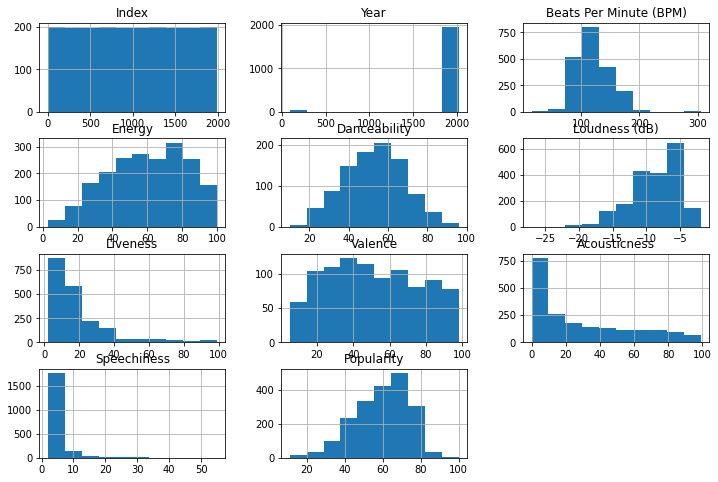

In [80]:
data_prod_df.hist(figsize=(12,8))

In [81]:
data_prod_df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1987.000000,1985.000000,1986.000000,970.000000,1987.000000,1986.000000,960.000000,1986.000000,1990.000000,1987.000000
mean,997.500000,1959.526422,120.230730,59.664149,52.983505,-9.009562,19.013092,50.820833,28.897281,4.989950,59.518873
std,575.762538,250.650856,28.625839,22.159565,15.426169,3.652092,16.739697,24.955125,29.020822,4.402899,14.362661
min,1.000000,92.000000,15.000000,3.000000,10.000000,-27.000000,2.000000,5.000000,0.000000,2.000000,11.000000
25%,499.250000,1978.000000,99.000000,42.000000,42.000000,-11.000000,9.000000,30.000000,3.000000,3.000000,49.000000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,49.000000,18.000000,4.000000,62.000000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,71.000000,50.000000,5.000000,71.000000
max,1994.000000,2019.000000,305.000000,100.000000,96.000000,-2.000000,99.000000,98.000000,99.000000,55.000000,100.000000


In [82]:
data_prod_df.Artist.value_counts()

Queen                 37
The Beatles           36
Coldplay              27
U2                    26
The Rolling Stones    24
                      ..
Peter Schilling        1
New Order              1
Limp Bizkit            1
Jethro Tull            1
Fats Domino            1
Name: Artist, Length: 729, dtype: int64

In [83]:
data_prod_df['Top Genre'].value_counts()

album rock           411
adult standards      122
dutch pop             88
alternative rock      86
dance pop             82
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: Top Genre, Length: 149, dtype: int64

In [84]:
data_prod_df['Year'].value_counts()

2008.0    54
1991.0    52
2018.0    52
1977.0    51
2002.0    47
          ..
1962.0     3
1959.0     3
1961.0     1
1960.0     1
1956.0     1
Name: Year, Length: 63, dtype: int64

#### Find Total of Nans and make sure they are the same as nulls.

In [85]:

data_prod_df.isna().sum()

Index                        0
Title                        3
Artist                       8
Top Genre                    8
Year                         7
Month                        0
Beats Per Minute (BPM)       9
Energy                       8
Danceability              1024
Loudness (dB)                7
Liveness                     8
Valence                   1034
Length (Duration)            9
Acousticness                 8
Speechiness                  4
Popularity                   7
dtype: int64

In [86]:
data_prod_df.isnull().sum()

Index                        0
Title                        3
Artist                       8
Top Genre                    8
Year                         7
Month                        0
Beats Per Minute (BPM)       9
Energy                       8
Danceability              1024
Loudness (dB)                7
Liveness                     8
Valence                   1034
Length (Duration)            9
Acousticness                 8
Speechiness                  4
Popularity                   7
dtype: int64

### Data Formating Issue 1
Why is Month a Object aka String? 

In [87]:
#count number of numeric values and non-numberic values.
data_prod_df.Month.str.isnumeric().value_counts()

True     1988
False       6
Name: Month, dtype: int64

In [88]:
#count number of null Values.
data_prod_df.Month.isna().value_counts()

False    1994
Name: Month, dtype: int64

In [89]:
# Find non-numeric Data to learn more.
data_prod_df[data_prod_df.Month.str.isnumeric()==False]

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
448,449,Titanium (feat. Sia),David Guetta,dance pop,2011.0,Jan,126.0,79.0,NaN,-4.0,13.0,30.0,245,7.0,10.0,67.0
809,810,Immigrant Song - Remaster,Led Zeppelin,album rock,1970.0,Dec,113.0,93.0,NaN,-10.0,35.0,62.0,146,1.0,6.0,77.0
1061,1062,Spread Your Wings - 2011 Mix,Queen,glam rock,1977.0,Sep,175.0,66.0,NaN,-6.0,6.0,46.0,274,28.0,3.0,50.0
1645,1646,Glory Box,Portishead,art pop,1994.0,Apr,120.0,43.0,51.0,-10.0,6.0,NaN,309,18.0,4.0,67.0
1717,1718,Per Spoor (Kedeng Kedeng),Guus Meeuwis,dutch pop,1996.0,Jun,126.0,88.0,NaN,-7.0,15.0,NaN,253,20.0,5.0,49.0
1896,1897,Little Wing,Jimi Hendrix,album rock,1967.0,May,71.0,53.0,52.0,-8.0,5.0,NaN,146,18.0,8.0,69.0


In [90]:
#use DateTime, map, and lamdba to convert short month to decimal month
from datetime import datetime

data_prod_df['Month'] = data_prod_df['Month'].\
    map(lambda x: datetime.strptime(x,'%b').strftime('%-m') if x.isnumeric()== False else x )

In [91]:
# Check to make sure change in month conversion occured.
data_prod_df[data_prod_df.Month.str.isnumeric()==False]

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity


In [92]:
# Check to make sure change in month conversion occured.
data_prod_df.Month.str.isnumeric().value_counts()

True    1994
Name: Month, dtype: int64

### Data Formating Issue 1
Why is length a String or object

In [93]:
data_prod_df['Length (Duration)'].str.isnumeric().value_counts()

True     1981
False       4
Name: Length (Duration), dtype: int64

In [94]:
data_prod_df['Length (Duration)'].isna().value_counts()

False    1985
True        9
Name: Length (Duration), dtype: int64

In [95]:
data_prod_df['Length (Duration)'] = data_prod_df['Length (Duration)'].\
    str.replace(',','').astype('float')

data_prod_df.dtypes

Index                       int64
Title                      object
Artist                     object
Top Genre                  object
Year                      float64
Month                      object
Beats Per Minute (BPM)    float64
Energy                    float64
Danceability              float64
Loudness (dB)             float64
Liveness                  float64
Valence                   float64
Length (Duration)         float64
Acousticness              float64
Speechiness               float64
Popularity                float64
dtype: object

## Question 2
### Find the number of missing values in each column and each row.


In [96]:
#find missing rows and columns
data_prod_df.isna()

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1990,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1991,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1992,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [97]:
# columns of nulls
data_prod_df.isna().sum()

Index                        0
Title                        3
Artist                       8
Top Genre                    8
Year                         7
Month                        0
Beats Per Minute (BPM)       9
Energy                       8
Danceability              1024
Loudness (dB)                7
Liveness                     8
Valence                   1034
Length (Duration)            9
Acousticness                 8
Speechiness                  4
Popularity                   7
dtype: int64

In [98]:
#rows with nulls
nulls = {}


for i in range(data_prod_df.shape[0]):
    nulls[i] = data_prod_df.loc[[i]].isna().sum().sum()

nulls


{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 1,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 1,
 92: 1,
 93: 1,
 94: 1,
 95: 1,
 96: 1,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 1,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

### Remove rows where at least 50% of the values are missing

In [99]:
# Figure out 50 of columns missing, to know which row to drow
perc = 50
min_count =  int(((100-perc)/100) * data_prod_df.shape[1])
print(min_count)

cleanrows_df=data_prod_df.dropna(axis=0, thresh=min_count)

8


In [100]:
# Checking for dropped Rows.
cleanrows_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1987 non-null   int64  
 1   Title                   1987 non-null   object 
 2   Artist                  1984 non-null   object 
 3   Top Genre               1983 non-null   object 
 4   Year                    1984 non-null   float64
 5   Month                   1987 non-null   object 
 6   Beats Per Minute (BPM)  1983 non-null   float64
 7   Energy                  1983 non-null   float64
 8   Danceability            970 non-null    float64
 9   Loudness (dB)           1983 non-null   float64
 10  Liveness                1983 non-null   float64
 11  Valence                 960 non-null    float64
 12  Length (Duration)       1982 non-null   float64
 13  Acousticness            1984 non-null   float64
 14  Speechiness             1986 non-null   


### Then remove columns where at least 50% of the values are missing.


In [101]:
# Figure out 50 of rows missing, to know which columns to drop

perc = 50
min_count =  int(((100-perc)/100) * data_prod_df.shape[0])
print(min_count)

cleancols_df=data_prod_df.dropna(axis=1, thresh=min_count)

997


In [102]:
cleancols_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1991 non-null   object 
 2   Artist                  1986 non-null   object 
 3   Top Genre               1986 non-null   object 
 4   Year                    1987 non-null   float64
 5   Month                   1994 non-null   object 
 6   Beats Per Minute (BPM)  1985 non-null   float64
 7   Energy                  1986 non-null   float64
 8   Loudness (dB)           1987 non-null   float64
 9   Liveness                1986 non-null   float64
 10  Length (Duration)       1985 non-null   float64
 11  Acousticness            1986 non-null   float64
 12  Speechiness             1990 non-null   float64
 13  Popularity              1987 non-null   float64
dtypes: float64(9), int64(1), object(4)
memor

## Question 3
### Calculate descriptive statistics for each column

In [103]:
cleancols_df.describe()


,Index,Year,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity
count,1994.000000,1987.000000,1985.000000,1986.000000,1987.000000,1986.000000,1985.000000,1986.000000,1990.000000,1987.000000
mean,997.500000,1959.526422,120.230730,59.664149,-9.009562,19.013092,262.612594,28.897281,4.989950,59.518873
std,575.762538,250.650856,28.625839,22.159565,3.652092,16.739697,93.749643,29.020822,4.402899,14.362661
min,1.000000,92.000000,15.000000,3.000000,-27.000000,2.000000,93.000000,0.000000,2.000000,11.000000
25%,499.250000,1978.000000,99.000000,42.000000,-11.000000,9.000000,212.000000,3.000000,3.000000,49.000000
50%,997.500000,1993.000000,119.000000,61.000000,-8.000000,12.000000,245.000000,18.000000,4.000000,62.000000
75%,1495.750000,2007.000000,136.000000,78.000000,-6.000000,23.000000,290.000000,50.000000,5.000000,71.000000
max,1994.000000,2019.000000,305.000000,100.000000,-2.000000,99.000000,1412.000000,99.000000,55.000000,100.000000


### Which columns have outliers?



Column: Index
mean: 997.5, std:575.7625378574053
Lower Bound: -729.7876135722158, Upper Bound: 2724.787613572216
Outlier count: 0 


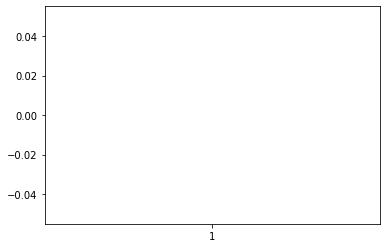

Column: Year
mean: 1959.5264217413185, std:250.65085605864195
Lower Bound: 1207.5738535653927, Upper Bound: 2711.4789899172442
Outlier count: 35 


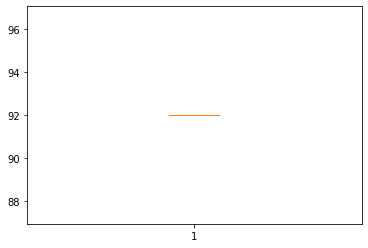

Column: Beats Per Minute (BPM)
mean: 120.23073047858942, std:28.625839238303264
Lower Bound: 34.35321276367962, Upper Bound: 206.1082481934992
Outlier count: 4 


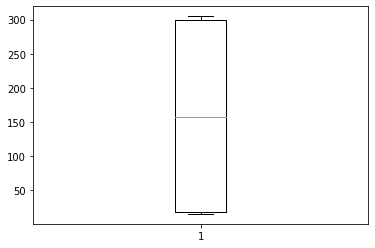

Column: Energy
mean: 59.66414904330312, std:22.159565457504634
Lower Bound: -6.814547329210775, Upper Bound: 126.14284541581702
Outlier count: 0 


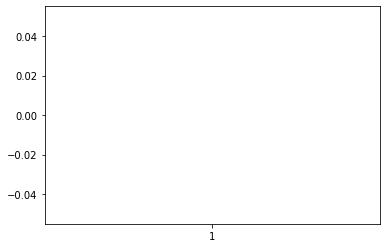

Column: Loudness (dB)
mean: -9.009562154001006, std:3.6520916711603446
Lower Bound: -19.96583716748204, Upper Bound: 1.9467128594800265
Outlier count: 22 


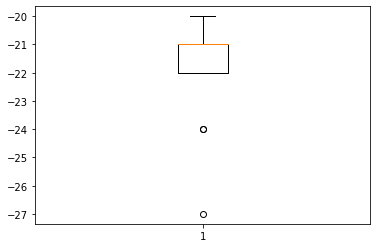

Column: Liveness
mean: 19.013091641490433, std:16.739697152708406
Lower Bound: -31.205999816634787, Upper Bound: 69.23218309961565
Outlier count: 57 


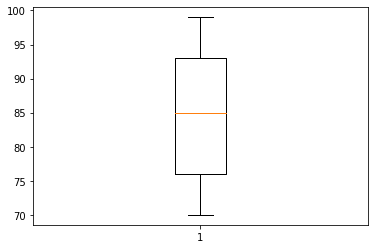

Column: Length (Duration)
mean: 262.6125944584383, std:93.74964270130445
Lower Bound: -18.636333645475077, Upper Bound: 543.8615225623516
Outlier count: 26 


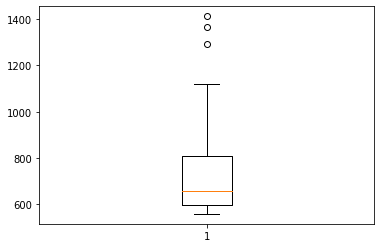

Column: Acousticness
mean: 28.897280966767372, std:29.020821547351673
Lower Bound: -58.16518367528765, Upper Bound: 115.95974560882239
Outlier count: 0 


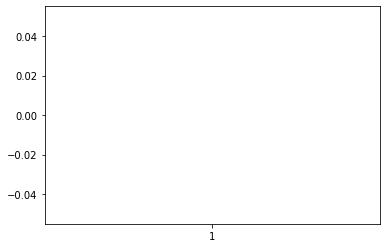

Column: Speechiness
mean: 4.989949748743719, std:4.402899028674128
Lower Bound: -8.218747337278664, Upper Bound: 18.1986468347661
Outlier count: 42 


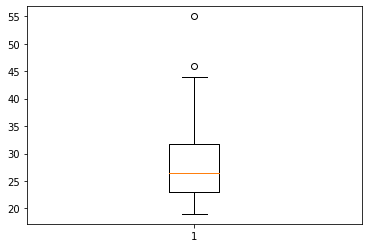

Column: Popularity
mean: 59.51887267237041, std:14.362660731929056
Lower Bound: 16.430890476583237, Upper Bound: 102.60685486815757
Outlier count: 9 


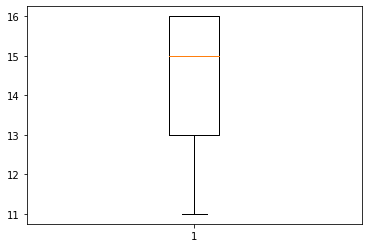

In [104]:
#Check each column for outliers

for column in cleancols_df.columns:
    if(pd.api.types.is_numeric_dtype(cleancols_df[column])):
        mean = cleancols_df[column].mean()
        std = cleancols_df[column].std()
        new_df = cleancols_df[(cleancols_df[column] < (mean - 3 * std)) | (cleancols_df[column] > (mean + 3 * std))] 
        print(f'=======================================================')
        print(f'Column: {column}') 
        print(f'mean: {mean}, std:{std}')
        print(f'Lower Bound: {mean - 3 * std}, Upper Bound: {mean + 3 * std}')
        print(f'Outlier count: {new_df.shape[0]} ')
        plt.boxplot(new_df[column])
        plt.show()
        print(f'=======================================================')

        
    



### Reviewing All outliers, we see more data formating errors with year.

In [105]:
# Look at year, year should be 1992
cleancols_df[cleancols_df['Year'] < 1000]

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity
1567,1568,Killing In The Name,Rage Against The Machine,alternative metal,92.0,1,89.0,83.0,-4.0,3.0,314.0,3.0,30.0,78.0
1568,1569,Fear of the Dark - 2015 Remaster,Iron Maiden,album rock,92.0,1,110.0,87.0,-6.0,23.0,438.0,0.0,6.0,55.0
1569,1570,Bed Of Roses,Bon Jovi,glam metal,92.0,11,165.0,60.0,-6.0,21.0,394.0,10.0,3.0,73.0
1570,1571,Everybody Hurts,R.E.M.,alternative rock,92.0,11,94.0,32.0,-10.0,12.0,320.0,62.0,3.0,74.0
1571,1572,Kayleigh,Marillion,album rock,92.0,4,106.0,67.0,-7.0,9.0,243.0,2.0,3.0,58.0
1572,1573,"Layla - Acoustic; Live at MTV Unplugged, Bray ...",Eric Clapton,album rock,92.0,7,94.0,52.0,-12.0,94.0,289.0,32.0,5.0,70.0
1573,1574,I Will Always Love You,Whitney Houston,dance pop,92.0,6,67.0,21.0,-13.0,8.0,271.0,84.0,4.0,77.0
1574,1575,Nightswimming,R.E.M.,alternative rock,92.0,9,114.0,39.0,-11.0,10.0,258.0,80.0,3.0,62.0
1575,1576,Conquest of Paradise,Vangelis,cyberpunk,92.0,11,74.0,30.0,-14.0,23.0,278.0,70.0,3.0,61.0
1576,1577,Would?,Alice In Chains,alternative metal,92.0,3,101.0,83.0,-8.0,9.0,207.0,0.0,4.0,71.0


### New format Error found, fixing Outlier with Data Transformation:


In [106]:
cleancols_df['Year'].loc[ cleancols_df['Year'] < 1000 ] = 1992
cleancols_df[cleancols_df['Year'] < 1000]


/var/folders/tq/t8mtqv314lg2510yzpslscmw0000gn/T/ipykernel_57007/4161138548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleancols_df['Year'].loc[ cleancols_df['Year'] < 1000 ] = 1992


,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity


In [107]:

print(cleancols_df.loc[cleancols_df['Month'] == '1992'])


Empty DataFrame
Columns: [Index, Title, Artist, Top Genre, Year, Month, Beats Per Minute (BPM), Energy, Loudness (dB), Liveness, Length (Duration), Acousticness, Speechiness, Popularity]
Index: []


## Question 4
 

### For continuous features, fill in the mean.

In [108]:
import numpy as np
from sklearn.impute import SimpleImputer


In [109]:
#fix the columns that need imputing. 
#stage 1:  What does one look like? 
     # yearfix_df = cleancols_df.copy()
     # yearfix_df['Year'] = imp.fit_transform(yearfix_df[['Year']])
     # yearfix_df[yearfix_df['Year'].isna()].Year.count()

#stage 2:   What are the columns we need to imput
# print(type(yearfix_df.isna().sum()))
# for index, value in yearfix_df.isna().sum().items():
#      print(f"Index : {index}, Value : {value}")


#stage 3: Abstract to loop 
# imputed_df=yearfix_df.copy()

# for index, value in imputed_df.isna().sum().items():
#     if value > 0 and pd.api.types.is_numeric_dtype(imputed_df[index]):
#           imputed_df[index] = imp.fit_transform(imputed_df[[index]])
    
# print(imputed_df.isna().sum()) 
   
#stage 4: Abstract to Function if needed.
def simple_numeric_imputer_helper(df):
     imp = SimpleImputer(missing_values=np.nan, strategy='mean')
     imputed_df=df.copy()
     for index, value in imputed_df.isna().sum().items():
          if value > 0 and pd.api.types.is_numeric_dtype(imputed_df[index]):
               imputed_df[index] = imp.fit_transform(imputed_df[[index]])
     return imputed_df  
    
new_imputed_df = simple_numeric_imputer_helper(cleancols_df)
print(new_imputed_df.isna().sum())

Index                     0
Title                     3
Artist                    8
Top Genre                 8
Year                      0
Month                     0
Beats Per Minute (BPM)    0
Energy                    0
Loudness (dB)             0
Liveness                  0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64


### For categorical features, fill in the mode

In [110]:
#Artist Fill in
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
new_imputed2_df=new_imputed_df.copy()
new_imputed2_df['Artist'] = imp.fit_transform(new_imputed2_df['Artist'].values.reshape(-1,1))[:,0]
new_imputed2_df.isna().sum()

Index                     0
Title                     3
Artist                    0
Top Genre                 8
Year                      0
Month                     0
Beats Per Minute (BPM)    0
Energy                    0
Loudness (dB)             0
Liveness                  0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [111]:
#Top Genre Fill in
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
new_imputed2_df['Top Genre'] = imp.fit_transform(new_imputed2_df['Top Genre'].values.reshape(-1,1))[:,0]
new_imputed2_df.isna().sum()

Index                     0
Title                     3
Artist                    0
Top Genre                 0
Year                      0
Month                     0
Beats Per Minute (BPM)    0
Energy                    0
Loudness (dB)             0
Liveness                  0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [112]:
#Top Genre Fill in
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
new_imputed2_df['Title'] = imp.fit_transform(new_imputed2_df['Title'].values.reshape(-1,1))[:,0]
new_imputed2_df.isna().sum()




Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Month                     0
Beats Per Minute (BPM)    0
Energy                    0
Loudness (dB)             0
Liveness                  0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [113]:
# starting with the previous fuction
# def simple_numberic_imputer_helper(df):
    # imp = SimpleImputer(missing_values=np.nan, strategy='mean') 
    # imputed_df=df.copy()
    #  for index, value in imputed_df.isna().sum().items():
    #       if value > 0 and pd.api.types.is_numeric_dtype(imputed_df[index]):
    #            imputed_df[index] = imp.fit_transform(imputed_df[[index]])
    #  return imputed_df  
    
# def simple_category_imputer_helper(df):
#      imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#      imputed_df=df.copy()
#      for index, value in imputed_df.isna().sum().items():
#           if value > 0 and not pd.api.types.is_numeric_dtype(imputed_df[index]):
#                print(value, index)
#                imputed_df[index] = imp.fit_transform(imputed_df[index].values.reshape(-1,1))[:,0]
#      return imputed_df

# imputed_finished_df = simple_category_imputer_helper(new_imputed_df)
# print(new_imputed_df.isna().sum())





## Question 5
Combine the date-related columns into one column with the Pandas to_datetime() method, then use that column to create a numeric Age column (in years). Calculate Age based on today's date; it doesn't have to be a whole number. Once you've created the Age column, remove the other date-related columns, including the one you created with Pandas.


In [114]:
#Combine the date-related columns into one column with the Pandas to_datetime() method
date_df = new_imputed2_df.copy()
combo_df = date_df[['Year','Month']]
combo_df=combo_df.astype({'Year':'int64'})
combo_df=combo_df.astype({'Year':'object'})
combo_df['comboDate'] =  combo_df['Year'].astype('str')+'/'+combo_df['Month'].astype('str')+'/1'
date_df['Date'] = pd.to_datetime(combo_df['comboDate'])
print(date_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Index                   1994 non-null   int64         
 1   Title                   1994 non-null   object        
 2   Artist                  1994 non-null   object        
 3   Top Genre               1994 non-null   object        
 4   Year                    1994 non-null   float64       
 5   Month                   1994 non-null   object        
 6   Beats Per Minute (BPM)  1994 non-null   float64       
 7   Energy                  1994 non-null   float64       
 8   Loudness (dB)           1994 non-null   float64       
 9   Liveness                1994 non-null   float64       
 10  Length (Duration)       1994 non-null   float64       
 11  Acousticness            1994 non-null   float64       
 12  Speechiness             1994 non-null   float64 

In [115]:
#then use that column to create a numeric Age column (in years)
now = pd.Timestamp('now')
date_df['Age'] = round((now - date_df['Date']).dt.days / 365, 2)
date_df

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity,Date,Age
0,1,Sunrise,Norah Jones,adult standards,2004.0,10,157.0,30.0,-14.0,11.0,201.0,94.0,3.0,71.0,2004-10-01,17.91
1,2,Black Night,Deep Purple,album rock,2000.0,3,135.0,79.0,-11.0,17.0,207.0,17.0,7.0,39.0,2000-03-01,22.50
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001.0,6,168.0,69.0,-9.0,7.0,341.0,2.0,17.0,69.0,2001-06-01,21.25
3,4,The Pretender,Foo Fighters,alternative metal,2007.0,1,173.0,96.0,-4.0,3.0,269.0,0.0,4.0,76.0,2007-01-01,15.66
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002.0,8,106.0,82.0,-5.0,10.0,256.0,1.0,3.0,59.0,2002-08-01,20.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958.0,4,94.0,21.0,-12.0,11.0,128.0,84.0,7.0,63.0,1958-04-01,64.45
1990,1991,Hound Dog,Elvis Presley,adult standards,1958.0,6,175.0,76.0,-8.0,76.0,136.0,73.0,6.0,69.0,1958-06-01,64.28
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959.0,4,168.0,80.0,-9.0,31.0,162.0,74.0,7.0,74.0,1959-04-01,63.45
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959.0,10,174.0,26.0,-13.0,7.0,324.0,54.0,4.0,65.0,1959-10-01,62.95


In [116]:
# remove the other date-related columns, including the one you created with Pandas.
date_df.drop(['Year','Month','Date'], axis=1, inplace=True)
print(date_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1994 non-null   object 
 2   Artist                  1994 non-null   object 
 3   Top Genre               1994 non-null   object 
 4   Beats Per Minute (BPM)  1994 non-null   float64
 5   Energy                  1994 non-null   float64
 6   Loudness (dB)           1994 non-null   float64
 7   Liveness                1994 non-null   float64
 8   Length (Duration)       1994 non-null   float64
 9   Acousticness            1994 non-null   float64
 10  Speechiness             1994 non-null   float64
 11  Popularity              1994 non-null   float64
 12  Age                     1994 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 202.6+ KB
None


### Create dummy variables for the categorical features. Drop one level of each feature to end up with k-1 dummies, not k.


In [117]:
dummy_df=date_df.copy()
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1994 non-null   object 
 2   Artist                  1994 non-null   object 
 3   Top Genre               1994 non-null   object 
 4   Beats Per Minute (BPM)  1994 non-null   float64
 5   Energy                  1994 non-null   float64
 6   Loudness (dB)           1994 non-null   float64
 7   Liveness                1994 non-null   float64
 8   Length (Duration)       1994 non-null   float64
 9   Acousticness            1994 non-null   float64
 10  Speechiness             1994 non-null   float64
 11  Popularity              1994 non-null   float64
 12  Age                     1994 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 202.6+ KB


In [118]:
dummy_df=pd.get_dummies(dummy_df, columns = ['Top Genre','Artist'], drop_first=True)
dummy_df


,Index,Title,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity,...,Artist_Yann Tiersen,Artist_Yes,Artist_Youp van 't Hek,Artist_Youssou N'Dour,Artist_Yusuf / Cat Stevens,Artist_ZZ Top,Artist_Zucchero,Artist_a-ha,Artist_blink-182,Artist_Édith Piaf
0,1,Sunrise,157.0,30.0,-14.0,11.0,201.0,94.0,3.0,71.0,...,0,0,0,0,0,0,0,0,0,0
1,2,Black Night,135.0,79.0,-11.0,17.0,207.0,17.0,7.0,39.0,...,0,0,0,0,0,0,0,0,0,0
2,3,Clint Eastwood,168.0,69.0,-9.0,7.0,341.0,2.0,17.0,69.0,...,0,0,0,0,0,0,0,0,0,0
3,4,The Pretender,173.0,96.0,-4.0,3.0,269.0,0.0,4.0,76.0,...,0,0,0,0,0,0,0,0,0,0
4,5,Waitin' On A Sunny Day,106.0,82.0,-5.0,10.0,256.0,1.0,3.0,59.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,94.0,21.0,-12.0,11.0,128.0,84.0,7.0,63.0,...,0,0,0,0,0,0,0,0,0,0
1990,1991,Hound Dog,175.0,76.0,-8.0,76.0,136.0,73.0,6.0,69.0,...,0,0,0,0,0,0,0,0,0,0
1991,1992,Johnny B. Goode,168.0,80.0,-9.0,31.0,162.0,74.0,7.0,74.0,...,0,0,0,0,0,0,0,0,0,0
1992,1993,Take Five,174.0,26.0,-13.0,7.0,324.0,54.0,4.0,65.0,...,0,0,0,0,0,0,0,0,0,0
